<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/pyTorch/008_ArtificialNeuralNetworkPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

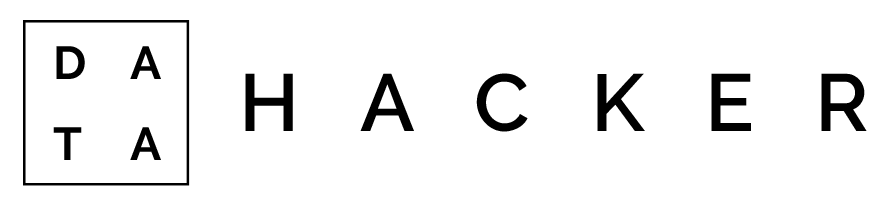
# Artificial Neural Network with Perceprton

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
 
import matplotlib.pyplot as plt
import numpy as np

## Exploring CIFAR10 dataset images

In [2]:
transform = transforms.ToTensor()

In [3]:
data_path = '../data_cifar/'
cifar10_train = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_test = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data_cifar/cifar-10-python.tar.gz to ../data_cifar/
Files already downloaded and verified


In [4]:
print("Training: ", len(cifar10_train))
print("Testing: ", len(cifar10_test))

Training:  50000
Testing:  10000


In [5]:
type(cifar10_train)

torchvision.datasets.cifar.CIFAR10

In [6]:
type(cifar10_test)

torchvision.datasets.cifar.CIFAR10

In [7]:
type(cifar10_train[0])

tuple

In [8]:
image, label = cifar10_train[0]
type(image)

torch.Tensor

In [9]:
image.shape

torch.Size([3, 32, 32])

In [10]:
classes = cifar10_train.classes
print (classes)
print(label)
print(classes[label])

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
6
frog


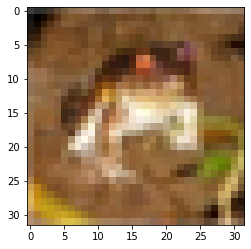

In [11]:
plt.imshow(image.permute(1, 2, 0))

In [12]:
torch.manual_seed(80)
train_loader = DataLoader(cifar10_train, batch_size=100, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=500, shuffle=False)

## Building the model

In [28]:
class MultilayerPerceptron(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, output_size)
        #self.dropout = nn.Dropout(p=0.5)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=1)

In [29]:
torch.manual_seed(80)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [15]:
for param in model.parameters():
  print(param.numel())

368640
120
10080
84
840
10


In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [16]:
for images, labels in train_loader:
  break

In [19]:
images.shape

torch.Size([100, 3, 32, 32])

In [20]:
images.view(-1, 3072).shape

torch.Size([100, 3072])

## Training the model

In [ ]:
import time
start_time = time.time()

epochs = 10

train_losses = []
test_losses = []
train_correct = []
test_correct  = []

for i in range(epochs):
   
    trn_corr = 0
    tst_corr = 0
    batch_corr = 0
    

    for b_iter, (X_train, y_train) in enumerate(train_loader):
      b_iter +=1

      y_pred = model(X_train.view(100, -1))
      loss = criterion(y_pred, y_train)
      
      predicted = torch.max(y_pred.data, 1)[1]
      batch_corr = (predicted == y_train).sum()
      trn_corr += batch_corr
      
      
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if b_iter % 100 == 0:
        
        accuracy = trn_corr.item()*100 / (100*b_iter)
        print( f'epoch: {i} batch {b_iter} loss:{loss.item()} accuracy:{accuracy} ')
    
    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
      
      for b_iter, (X_test, y_test) in enumerate(test_loader):
        
        y_val = model(X_test.view(500, -1))
        
        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()
     
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

total_time = time.time() - start_time
print( f' Duration: {total_time/60} mins')

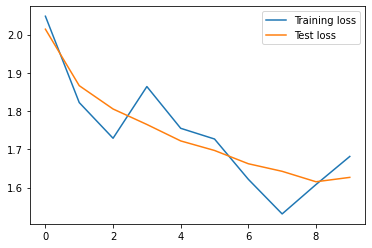

In [33]:
plt.plot(train_losses, label= "Training loss")
plt.plot(test_losses, label= "Test loss")
plt.legend()

In [34]:
train_accuracy =[t/500 for t in train_correct ] 
train_accuracy

[tensor(20.3320),
 tensor(30.0520),
 tensor(33.0200),
 tensor(35.1380),
 tensor(36.4520),
 tensor(37.8920),
 tensor(39.1180),
 tensor(40.1260),
 tensor(41.1040),
 tensor(41.9740)]

In [35]:
test_accuracy =[t/100 for t in test_correct ] 
test_accuracy

[tensor(28.7900),
 tensor(32.),
 tensor(34.3600),
 tensor(36.1000),
 tensor(37.6900),
 tensor(37.7000),
 tensor(40.4400),
 tensor(41.0100),
 tensor(42.5200),
 tensor(42.3100)]

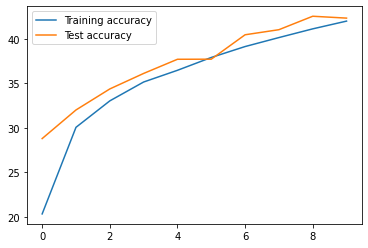

In [36]:
plt.plot(train_accuracy, label= "Training accuracy")
plt.plot(test_accuracy, label= "Test accuracy")
plt.legend()

In [37]:
test_load_all = DataLoader(cifar10_test, batch_size=10000, shuffle=False)

In [39]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_all: 
    y_val = model(X_test.view(len(X_test),-1))
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()

In [41]:
100*correct.item()/len(cifar10_test)

42.31

In [42]:
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[372,  38,  75,  11,  41,  12,   3,  23,  85,  43],
       [ 25, 460,  19,  18,  12,  16,  13,  24,  60, 130],
       [130,  20, 294,  98, 167,  99,  61,  76,  29,   9],
       [ 39,  41,  72, 240,  51, 149,  60,  68,  27,  44],
       [  9,  15,  81,  28, 231,  38,  49,  87,   8,  10],
       [ 24,  31,  69, 205,  50, 350,  53,  66,  37,  20],
       [ 64,  83, 279, 263, 310, 219, 721, 123,  37,  90],
       [ 58,  37,  65,  54,  87,  64,  17, 448,  20,  52],
       [212,  92,  30,  31,  31,  35,  11,  20, 603,  90],
       [ 67, 183,  16,  52,  20,  18,  12,  65,  94, 512]])

In [45]:
img = images[0].view(1, 3072)
 
# we are turning off the gradients
with torch.no_grad():
    model_prediction = model.forward(img)

[0.03184008 0.02611281 0.0521138  0.42695633 0.01151021 0.1297387
 0.21896307 0.01642793 0.00443298 0.08190407]


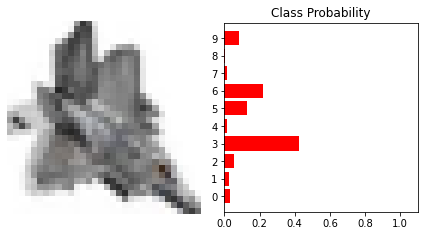

In [48]:
probabilities = F.softmax(model_prediction, dim=1).detach().cpu().numpy().squeeze()

print(probabilities)

fig, (ax1, ax2) = plt.subplots(figsize=(6,8), ncols=2)
img = img.view(3, 32, 32)
ax1.imshow(img.permute(1, 2, 0).detach().cpu().numpy().squeeze(), cmap='inferno')
ax1.axis('off')
ax2.barh(np.arange(10), probabilities, color='r' )
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)

plt.tight_layout()

In [49]:
test_load_all = DataLoader(cifar10_test, batch_size=64, shuffle=False)

In [50]:
images, labels = next(iter(test_load_all))
 
with torch.no_grad():
  images, labels = images, labels
  preds = model(X_test.view(len(X_test),-1))
 
images_np = [i.mean(dim=0).cpu().numpy() for i in images]
class_names = cifar10_test.classes

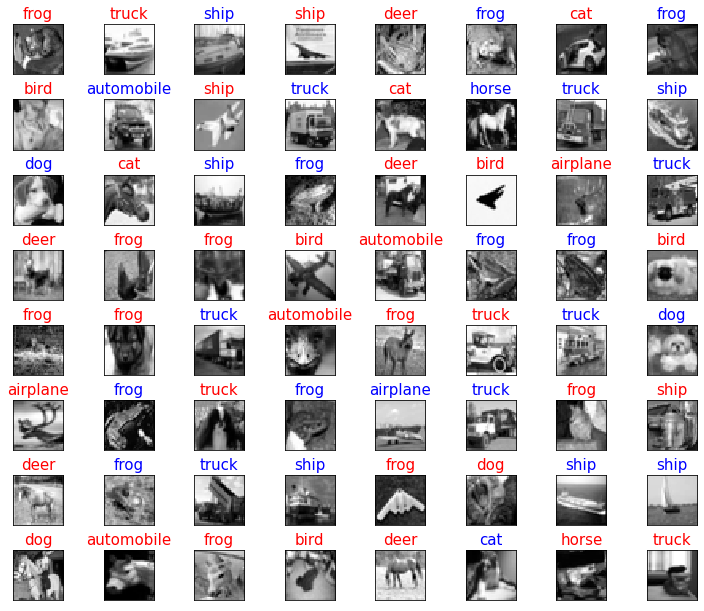

In [51]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)
 
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(images_np[i], cmap='gray', interpolation='nearest')
    color = "blue" if labels[i] == torch.max(preds[i], 0)[1] else "red"
    plt.title(class_names[torch.max(preds[i], 0)[1]], color=color, fontsize=15)